In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv("D:\\CLG\\TY SEM-5\\Data Science\\Dataset.csv",parse_dates=['timestamp'],index_col=['timestamp'])

C:\Users\bhagyashree\AppData\Local\Temp\ipykernel_22024\1410863154.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv("D:\\CLG\\TY SEM-5\\Data Science\\Dataset.csv",parse_dates=['timestamp'],index_col=['timestamp'])


In [3]:
data.head()

,adjclose,low,volume,open,high,close
timestamp,,,,,,
2020-12-26,1.596896,2.318946,1.582264,237653073.0,2.434916,1.596896
2020-12-27,1.062112,1.597744,1.056657,183978307.0,1.630781,1.062112
2020-12-28,1.110076,1.064454,1.049051,119337529.0,1.254447,1.110076
2020-12-29,0.887798,1.110460,0.761151,137916899.0,1.111282,0.887798
2020-12-30,1.090341,0.887512,0.874251,182382243.0,1.247288,1.090341


In [4]:
data.sort_index()

,adjclose,low,volume,open,high,close
timestamp,,,,,,
2017-11-09 00:00:00,0.032053,0.025160,3.506000e-02,1.871620e+07,2.500600e-02,0.032053
2017-11-09 00:00:00,0.144135,0.144901,6.014000e+03,1.379290e-01,1.286180e-01,0.144135
2017-11-10 00:00:00,0.027119,0.032219,3.334800e-02,6.766780e+06,2.645100e-02,0.027119
2017-11-10 00:00:00,0.123451,0.155885,3.471000e+03,1.445860e-01,7.721400e-02,0.123451
2017-11-11 00:00:00,0.027437,0.026891,2.965900e-02,5.532220e+06,2.568400e-02,0.027437
...,...,...,...,...,...,...
2022-09-28 08:54:00,0.582045,0.608519,5.801963e-01,4.452824e+07,6.110096e-01,0.582045
2022-09-28 08:57:00,2.047277,2.108730,1.096229e+06,2.092983e+00,2.040869e+00,2.047277
2022-09-28 08:57:00,0.187471,0.191229,1.858970e-01,1.920075e-01,2.378834e+06,0.187471


In [5]:
data.head(-5)

,adjclose,low,volume,open,high,close
timestamp,,,,,,
2020-12-26,1.596896,2.318946,1.582264e+00,2.376531e+08,2.434916,1.596896
2020-12-27,1.062112,1.597744,1.056657e+00,1.839783e+08,1.630781,1.062112
2020-12-28,1.110076,1.064454,1.049051e+00,1.193375e+08,1.254447,1.110076
2020-12-29,0.887798,1.110460,7.611510e-01,1.379169e+08,1.111282,0.887798
2020-12-30,1.090341,0.887512,8.742510e-01,1.823822e+08,1.247288,1.090341
...,...,...,...,...,...,...
2022-09-19,0.133872,0.124315,1.087363e+07,1.300050e-01,0.134078,0.133872
2022-09-20,0.126754,0.126230,5.821568e+06,1.339200e-01,0.133920,0.126754
2022-09-21,0.129464,0.126429,3.690217e+07,1.268010e-01,0.138263,0.129464


In [6]:
data.shape

(8040, 6)

In [7]:
data.isna().sum()

adjclose    0
low         0
volume      0
open        0
high        0
close       0
dtype: int64

In [8]:
data.duplicated().sum()

3

In [9]:
data.drop_duplicates() 

,adjclose,low,volume,open,high,close
timestamp,,,,,,
2020-12-26 00:00:00,1.596896,2.318946,1.582264e+00,2.376531e+08,2.434916,1.596896
2020-12-27 00:00:00,1.062112,1.597744,1.056657e+00,1.839783e+08,1.630781,1.062112
2020-12-28 00:00:00,1.110076,1.064454,1.049051e+00,1.193375e+08,1.254447,1.110076
2020-12-29 00:00:00,0.887798,1.110460,7.611510e-01,1.379169e+08,1.111282,0.887798
2020-12-30 00:00:00,1.090341,0.887512,8.742510e-01,1.823822e+08,1.247288,1.090341
...,...,...,...,...,...,...
2022-09-24 00:00:00,0.132186,0.131469,7.119868e+06,1.326660e-01,0.133854,0.132186
2022-09-25 00:00:00,0.127810,0.127750,3.716594e+06,1.321830e-01,0.132719,0.127810
2022-09-26 00:00:00,0.126626,0.122706,5.522984e+06,1.278050e-01,0.128168,0.126626


In [10]:
data['close'].dtype

dtype('float64')

In [11]:
data['close'] = data['close'].astype(float)  # Convert to float

In [12]:
data.head()

,adjclose,low,volume,open,high,close
timestamp,,,,,,
2020-12-26,1.596896,2.318946,1.582264,237653073.0,2.434916,1.596896
2020-12-27,1.062112,1.597744,1.056657,183978307.0,1.630781,1.062112
2020-12-28,1.110076,1.064454,1.049051,119337529.0,1.254447,1.110076
2020-12-29,0.887798,1.110460,0.761151,137916899.0,1.111282,0.887798
2020-12-30,1.090341,0.887512,0.874251,182382243.0,1.247288,1.090341


In [13]:
data.shape

(8040, 6)

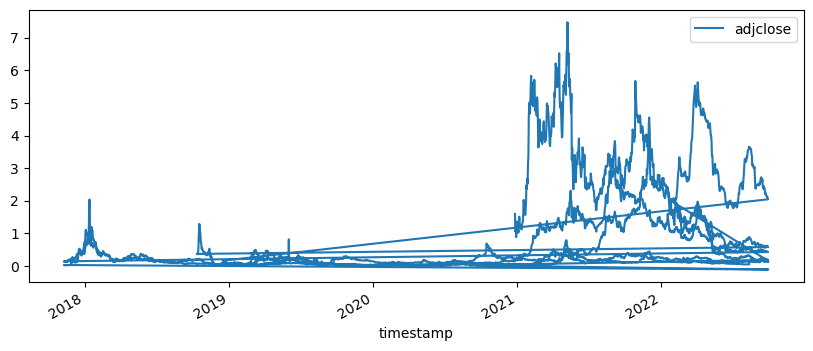

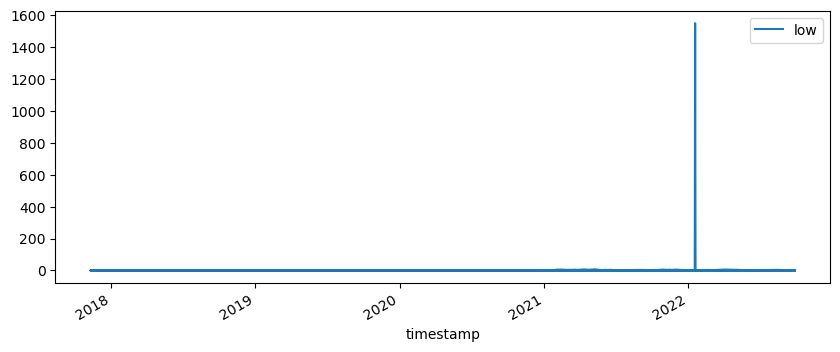

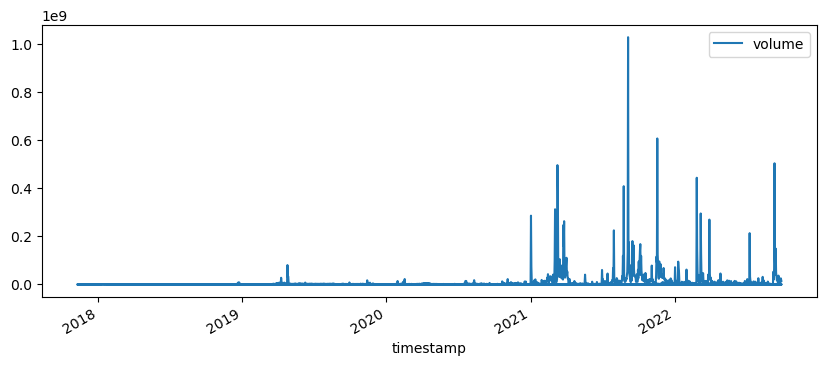

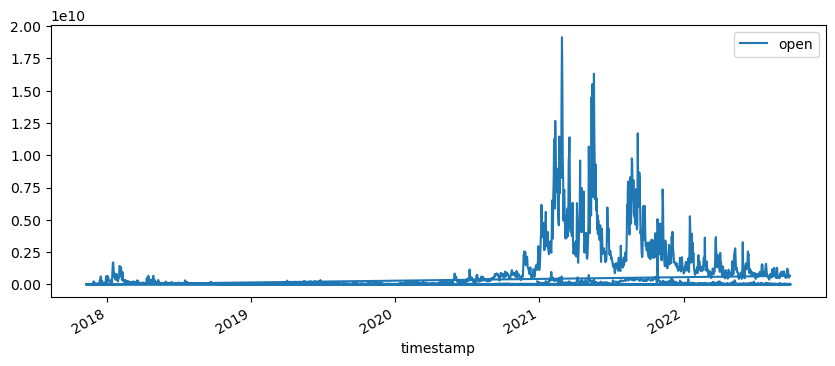

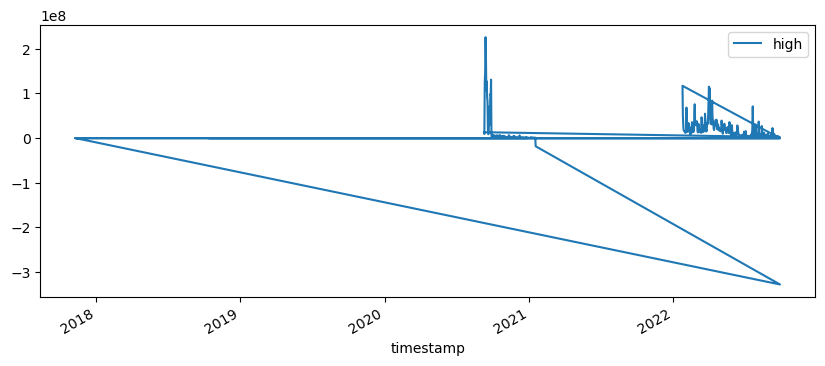

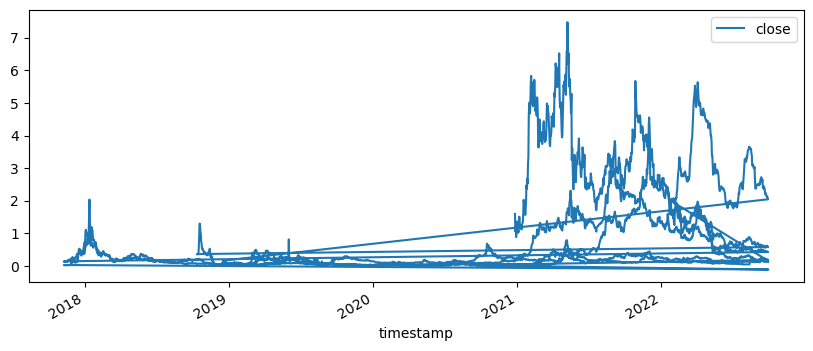

In [14]:
for i in data :
        plt.figure(figsize=(10, 4))
        data[i].plot(legend=i)
        plt.legend()

In [15]:
def create_f(df):
  df=df.copy()
  df['hour']=df.index.hour
  df['day']=df.index.day
  df['month']=df.index.month
  df['year']=df.index.month
  df['dayofweek']=df.index.dayofweek
  df['dayofyear']=df.index.dayofweek
  df['weekofyear']=df.index.isocalendar().week
    
  return df

In [16]:
 df = create_f(data)

In [17]:
df.head()

,adjclose,low,volume,open,high,close,hour,day,month,year,dayofweek,dayofyear,weekofyear
timestamp,,,,,,,,,,,,,
2020-12-26,1.596896,2.318946,1.582264,237653073.0,2.434916,1.596896,0,26,12,12,5,5,52
2020-12-27,1.062112,1.597744,1.056657,183978307.0,1.630781,1.062112,0,27,12,12,6,6,52
2020-12-28,1.110076,1.064454,1.049051,119337529.0,1.254447,1.110076,0,28,12,12,0,0,53
2020-12-29,0.887798,1.110460,0.761151,137916899.0,1.111282,0.887798,0,29,12,12,1,1,53
2020-12-30,1.090341,0.887512,0.874251,182382243.0,1.247288,1.090341,0,30,12,12,2,2,53


<Axes: >

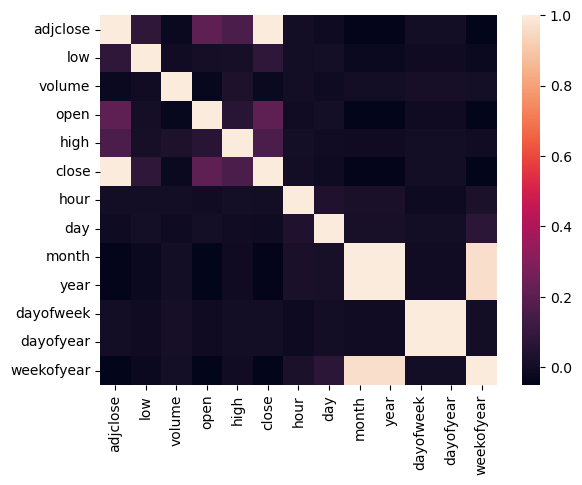

In [18]:
#correlation
sns.heatmap(df.corr())

In [19]:
#generating window
#24 hours window to predict 25th hour using only close feature
close=df.iloc[:,3]
windows=[]
target=[]
length=240
for i in (range(len(close)-length)):
    x = close.iloc[i:i+length] #its feature on its learn
    y = close.iloc[i+length] #generate output
    windows.append(x)
    target.append(y)

windows=np.array(windows)
target=np.array(target).reshape(-1,1)

In [20]:
#create train & test data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
windows_sc=sc.fit_transform(windows)   
target_sc=sc.fit_transform(target)

windows_sc = windows_sc.reshape((len(windows_sc),length,1))

In [21]:
#splitting 
split = int(0.8*len(windows_sc))#due to time series split its manually

X_train = windows_sc[:split,:,:]
X_test = windows_sc[split:,:,:]
y_train = target_sc[:split,:]
y_test = target_sc[split:,:]

In [22]:
print(X_train.shape,y_train.shape)

(6240, 240, 1) (6240, 1)


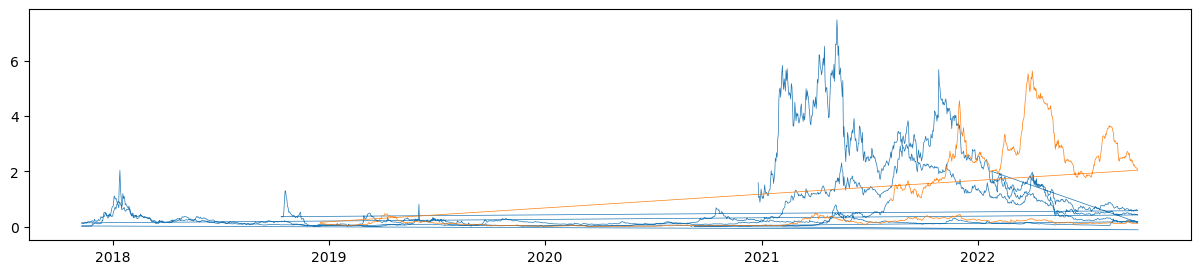

In [23]:
#plotting training & testing data
plt.figure(figsize=(15,3))
plt.plot(df['close'][:split],label='Train',linewidth=0.5)
plt.plot(df['close'][split:],label='Test',linewidth=0.5)

In [24]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [25]:
!pip install tensorflow

In [26]:
from keras.models import Sequential
from keras.layers import LSTM,Dense, Dropout
from sklearn.metrics import *

In [27]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))  # Change activation if needed
model.compile(optimizer='adam', loss='mse')

C:\Users\bhagyashree\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(X_train,y_train,epochs=5,batch_size=100,verbose=1)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 320ms/step - loss: 0.0019
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 326ms/step - loss: 7.7258e-04
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - loss: 7.7317e-04
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 311ms/step - loss: 7.4590e-04
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 314ms/step - loss: 8.5985e-04


In [63]:
plt.plot(model.history.history['loss'])

KeyError: 'loss'

In [67]:
pred_sc=model.predict(X_test)
pred=sc.inverse_transform(pred_sc)
y_test_ic=sc.inverse_transform(y_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


The coefficient of determination (R-Squared)=-11436046635958.404297


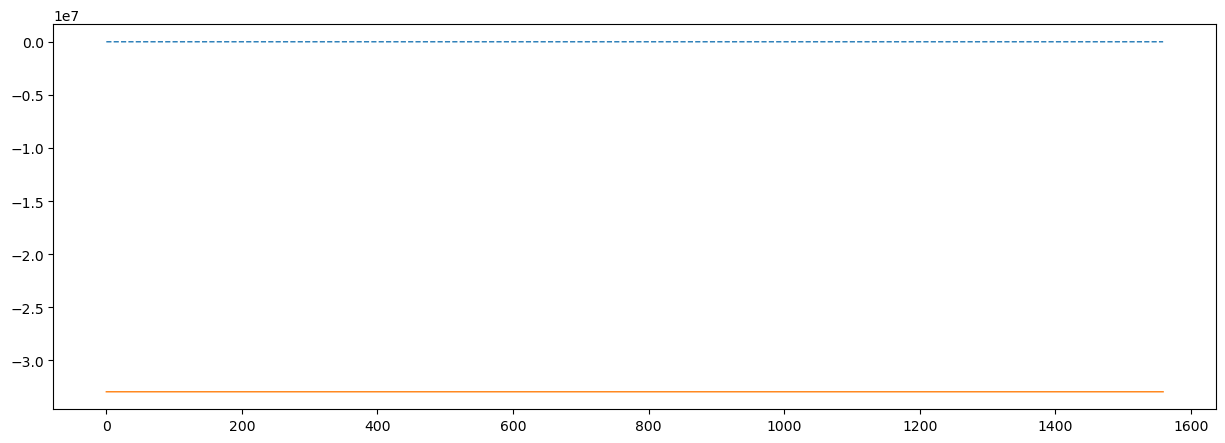

In [71]:
print('The coefficient of determination (R-Squared)={: 3f}'.format(r2_score(pred,y_test_ic)))
plt.figure(figsize=(15,5))
plt.plot(y_test_ic,'--',label='Actual',linewidth=1)
plt.plot(pred,label='Predicted',linewidth=1)

In [77]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))  # Change activation if needed
model.compile(optimizer='adam', loss='mse')

C:\Users\bhagyashree\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [79]:
#training on entire data
X=windows_sc
y=target_sc
model.fit(X,y,epochs=5,batch_size=100,verbose=1)

Epoch 1/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 27s 310ms/step - loss: 0.0011
Epoch 2/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - loss: 6.0201e-04
Epoch 3/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 23s 296ms/step - loss: 5.9024e-04
Epoch 4/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 23s 291ms/step - loss: 5.7896e-04
Epoch 5/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 23s 294ms/step - loss: 5.6315e-04


In [114]:
from datetime import datetime
from tqdm import tqdm
str_d1='2022/09/28'
str_d2='2022/10/28'
#convert date to string
d1= datetime.strptime(str_d1,"%Y/%m/%d")
d2= datetime.strptime(str_d2,"%Y/%m/%d")
delta =d2-d1
steps_in_future=delta.days*24
print("Steps in future:",steps_in_future)

Steps in future: 720


In [116]:
f_wind=windows_sc[-1]
f_tar=target_sc[-1]
new=[]

for i in tqdm(range(steps_in_future)):
    curr=np.append(f_wind[1:],[f_tar]).reshape(-1,1)
    next_pred=model.predict(curr.reshape(1,length,1))
    new.append(next_pred[0][0])
    f_wind=curr
    f_tar=next_pred

  0%|          | 0/720 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  0%|          | 1/720 [00:00<01:34,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  0%|          | 2/720 [00:00<01:36,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  0%|          | 3/720 [00:00<01:33,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  1%|          | 4/720 [00:00<01:31,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  1%|          | 5/720 [00:00<01:28,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  1%|          | 6/720 [00:00<01:33,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  1%|          | 7/720 [00:00<01:41,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  1%|          | 8/720 [00:01<01:42,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  1%|▏         | 9/720 [00:01<01:40,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  1%|▏         | 10/720 [00:01<01:34,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  2%|▏         | 11/720 [00:01<01:35,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  2%|▏         | 12/720 [00:01<01:32,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  2%|▏         | 13/720 [00:01<01:31,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  2%|▏         | 14/720 [00:01<01:29,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  2%|▏         | 15/720 [00:02<01:35,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  2%|▏         | 16/720 [00:02<01:38,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  2%|▏         | 17/720 [00:02<01:56,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  2%|▎         | 18/720 [00:02<01:59,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  3%|▎         | 19/720 [00:02<01:53,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  3%|▎         | 20/720 [00:02<01:46,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  3%|▎         | 21/720 [00:02<01:46,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  3%|▎         | 22/720 [00:03<01:40,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  3%|▎         | 23/720 [00:03<01:39,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  3%|▎         | 24/720 [00:03<01:34,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  3%|▎         | 25/720 [00:03<01:32,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  4%|▎         | 26/720 [00:03<01:30,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  4%|▍         | 27/720 [00:03<01:26,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  4%|▍         | 28/720 [00:03<01:25,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  4%|▍         | 29/720 [00:03<01:26,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  4%|▍         | 30/720 [00:04<01:28,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  4%|▍         | 31/720 [00:04<01:29,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  4%|▍         | 32/720 [00:04<01:35,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  5%|▍         | 33/720 [00:04<01:36,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


  5%|▍         | 34/720 [00:04<01:32,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  5%|▍         | 35/720 [00:04<01:30,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  5%|▌         | 36/720 [00:04<01:38,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  5%|▌         | 37/720 [00:05<01:41,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  5%|▌         | 38/720 [00:05<01:41,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  5%|▌         | 39/720 [00:05<01:38,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  6%|▌         | 40/720 [00:05<01:36,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  6%|▌         | 41/720 [00:05<01:38,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  6%|▌         | 42/720 [00:05<01:38,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  6%|▌         | 43/720 [00:06<01:51,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  6%|▌         | 44/720 [00:06<01:58,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  6%|▋         | 45/720 [00:06<01:57,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  6%|▋         | 46/720 [00:06<01:57,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  7%|▋         | 47/720 [00:06<01:54,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  7%|▋         | 48/720 [00:06<01:46,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  7%|▋         | 49/720 [00:07<01:40,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  7%|▋         | 50/720 [00:07<01:34,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  7%|▋         | 51/720 [00:07<01:37,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  7%|▋         | 52/720 [00:07<02:02,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  7%|▋         | 53/720 [00:07<02:02,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  8%|▊         | 54/720 [00:07<01:51,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  8%|▊         | 55/720 [00:08<01:46,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  8%|▊         | 56/720 [00:08<01:35,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  8%|▊         | 57/720 [00:08<01:35,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  8%|▊         | 58/720 [00:08<01:29,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  8%|▊         | 59/720 [00:08<01:24,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  8%|▊         | 60/720 [00:08<01:31,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  8%|▊         | 61/720 [00:08<01:40,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  9%|▊         | 62/720 [00:09<01:41,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  9%|▉         | 63/720 [00:09<01:36,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  9%|▉         | 64/720 [00:09<01:32,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  9%|▉         | 65/720 [00:09<01:34,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  9%|▉         | 66/720 [00:09<01:34,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  9%|▉         | 67/720 [00:09<01:27,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  9%|▉         | 68/720 [00:09<01:24,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 10%|▉         | 69/720 [00:09<01:24,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 10%|▉         | 70/720 [00:10<01:31,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 10%|▉         | 71/720 [00:10<01:42,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 10%|█         | 72/720 [00:10<01:38,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 10%|█         | 73/720 [00:10<01:42,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 10%|█         | 74/720 [00:10<01:43,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 10%|█         | 75/720 [00:10<01:43,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 11%|█         | 76/720 [00:11<01:39,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 11%|█         | 77/720 [00:11<01:41,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 11%|█         | 78/720 [00:11<01:38,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 11%|█         | 79/720 [00:11<01:31,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 11%|█         | 80/720 [00:11<01:26,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 11%|█▏        | 81/720 [00:11<01:27,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 11%|█▏        | 82/720 [00:11<01:29,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 12%|█▏        | 83/720 [00:12<01:25,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 12%|█▏        | 84/720 [00:12<01:26,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 12%|█▏        | 85/720 [00:12<01:22,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 12%|█▏        | 86/720 [00:12<01:26,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 12%|█▏        | 87/720 [00:12<01:28,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 12%|█▏        | 88/720 [00:12<01:23,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 12%|█▏        | 89/720 [00:12<01:21,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 12%|█▎        | 90/720 [00:12<01:23,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 13%|█▎        | 91/720 [00:13<01:22,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 13%|█▎        | 92/720 [00:13<01:19,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 13%|█▎        | 94/720 [00:13<01:12,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 13%|█▎        | 95/720 [00:13<01:18,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 13%|█▎        | 96/720 [00:13<01:22,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 13%|█▎        | 97/720 [00:13<01:18,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 14%|█▎        | 98/720 [00:13<01:23,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 14%|█▍        | 99/720 [00:14<01:30,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 14%|█▍        | 100/720 [00:14<01:28,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 14%|█▍        | 101/720 [00:14<01:27,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 14%|█▍        | 102/720 [00:14<01:22,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 14%|█▍        | 103/720 [00:14<01:24,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 14%|█▍        | 104/720 [00:14<01:21,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 15%|█▍        | 105/720 [00:14<01:17,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 15%|█▍        | 106/720 [00:15<01:16,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 15%|█▍        | 107/720 [00:15<01:32,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 15%|█▌        | 108/720 [00:15<01:36,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 15%|█▌        | 109/720 [00:15<01:42,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 15%|█▌        | 110/720 [00:15<01:37,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 15%|█▌        | 111/720 [00:15<01:36,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 16%|█▌        | 112/720 [00:16<01:30,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 16%|█▌        | 113/720 [00:16<01:25,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 16%|█▌        | 114/720 [00:16<01:22,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 16%|█▌        | 115/720 [00:16<01:17,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 16%|█▌        | 116/720 [00:16<01:19,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 16%|█▋        | 117/720 [00:16<01:15,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 16%|█▋        | 118/720 [00:16<01:15,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 17%|█▋        | 119/720 [00:16<01:15,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 17%|█▋        | 120/720 [00:17<01:15,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 17%|█▋        | 121/720 [00:17<01:20,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 17%|█▋        | 122/720 [00:17<01:24,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 17%|█▋        | 123/720 [00:17<01:18,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 17%|█▋        | 124/720 [00:17<01:20,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 17%|█▋        | 125/720 [00:17<01:18,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 18%|█▊        | 126/720 [00:17<01:28,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 18%|█▊        | 127/720 [00:18<01:32,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 18%|█▊        | 128/720 [00:18<01:32,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 18%|█▊        | 129/720 [00:18<01:32,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 18%|█▊        | 130/720 [00:18<01:29,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 18%|█▊        | 131/720 [00:18<01:27,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 18%|█▊        | 132/720 [00:18<01:25,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 18%|█▊        | 133/720 [00:18<01:33,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 19%|█▊        | 134/720 [00:19<01:38,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 19%|█▉        | 135/720 [00:19<01:38,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 19%|█▉        | 136/720 [00:19<01:37,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|█▉        | 137/720 [00:19<01:43,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 19%|█▉        | 138/720 [00:19<01:41,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 19%|█▉        | 139/720 [00:20<01:42,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 140/720 [00:20<01:49,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 20%|█▉        | 141/720 [00:20<01:44,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 20%|█▉        | 142/720 [00:20<01:33,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 20%|█▉        | 143/720 [00:20<01:26,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 20%|██        | 144/720 [00:20<01:22,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 20%|██        | 145/720 [00:20<01:20,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 20%|██        | 146/720 [00:21<01:19,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 20%|██        | 147/720 [00:21<01:18,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 21%|██        | 148/720 [00:21<01:18,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 21%|██        | 149/720 [00:21<01:19,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 21%|██        | 150/720 [00:21<01:23,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 21%|██        | 151/720 [00:21<01:24,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 21%|██        | 152/720 [00:21<01:21,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 21%|██▏       | 153/720 [00:22<01:17,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 21%|██▏       | 154/720 [00:22<01:13,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 22%|██▏       | 155/720 [00:22<01:14,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 22%|██▏       | 156/720 [00:22<01:15,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 22%|██▏       | 157/720 [00:22<01:18,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 22%|██▏       | 158/720 [00:22<01:20,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 22%|██▏       | 159/720 [00:22<01:19,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 22%|██▏       | 160/720 [00:23<01:15,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 22%|██▏       | 161/720 [00:23<01:12,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 22%|██▎       | 162/720 [00:23<01:09,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 23%|██▎       | 163/720 [00:23<01:09,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 23%|██▎       | 164/720 [00:23<01:11,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 23%|██▎       | 165/720 [00:23<01:11,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 23%|██▎       | 166/720 [00:23<01:15,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 23%|██▎       | 167/720 [00:23<01:14,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 23%|██▎       | 168/720 [00:24<01:12,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 23%|██▎       | 169/720 [00:24<01:10,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 24%|██▎       | 170/720 [00:24<01:08,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 24%|██▍       | 171/720 [00:24<01:09,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 24%|██▍       | 172/720 [00:24<01:08,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 24%|██▍       | 173/720 [00:24<01:07,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 24%|██▍       | 174/720 [00:24<01:06,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 24%|██▍       | 175/720 [00:24<01:08,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 24%|██▍       | 176/720 [00:25<01:06,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 25%|██▍       | 177/720 [00:25<01:06,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 25%|██▍       | 178/720 [00:25<01:07,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 25%|██▍       | 179/720 [00:25<01:09,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 25%|██▌       | 180/720 [00:25<01:08,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 25%|██▌       | 181/720 [00:25<01:07,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 25%|██▌       | 182/720 [00:25<01:06,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 25%|██▌       | 183/720 [00:25<01:04,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 26%|██▌       | 184/720 [00:26<01:05,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 26%|██▌       | 185/720 [00:26<01:08,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 26%|██▌       | 186/720 [00:26<01:09,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 26%|██▌       | 187/720 [00:26<01:08,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 26%|██▌       | 188/720 [00:26<01:11,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 26%|██▋       | 189/720 [00:26<01:08,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 26%|██▋       | 190/720 [00:26<01:04,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 27%|██▋       | 191/720 [00:26<01:02,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 27%|██▋       | 192/720 [00:27<01:05,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 27%|██▋       | 193/720 [00:27<01:05,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 27%|██▋       | 194/720 [00:27<01:03,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 27%|██▋       | 195/720 [00:27<01:05,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 27%|██▋       | 196/720 [00:27<01:05,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 27%|██▋       | 197/720 [00:27<01:04,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 28%|██▊       | 198/720 [00:27<01:04,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 28%|██▊       | 199/720 [00:27<01:05,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 28%|██▊       | 200/720 [00:28<01:18,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 28%|██▊       | 201/720 [00:28<01:14,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 28%|██▊       | 202/720 [00:28<01:09,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 28%|██▊       | 203/720 [00:28<01:09,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 28%|██▊       | 204/720 [00:28<01:07,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 28%|██▊       | 205/720 [00:28<01:05,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 29%|██▊       | 206/720 [00:28<01:03,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 29%|██▉       | 207/720 [00:29<01:09,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 29%|██▉       | 208/720 [00:29<01:15,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 29%|██▉       | 209/720 [00:29<01:12,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 29%|██▉       | 210/720 [00:29<01:11,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 29%|██▉       | 211/720 [00:29<01:07,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 29%|██▉       | 212/720 [00:29<01:08,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 30%|██▉       | 213/720 [00:29<01:08,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 30%|██▉       | 214/720 [00:29<01:06,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 30%|██▉       | 215/720 [00:30<01:04,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 30%|███       | 216/720 [00:30<01:04,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 30%|███       | 217/720 [00:30<01:03,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 30%|███       | 218/720 [00:30<01:07,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 30%|███       | 219/720 [00:30<01:05,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 31%|███       | 220/720 [00:30<01:05,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 31%|███       | 221/720 [00:30<01:03,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 31%|███       | 222/720 [00:30<01:02,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 31%|███       | 223/720 [00:31<01:01,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 31%|███       | 224/720 [00:31<01:05,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 31%|███▏      | 225/720 [00:31<01:04,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 31%|███▏      | 226/720 [00:31<01:06,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 32%|███▏      | 227/720 [00:31<01:04,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 32%|███▏      | 228/720 [00:31<01:05,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 32%|███▏      | 229/720 [00:31<01:07,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 32%|███▏      | 230/720 [00:32<01:25,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 32%|███▏      | 231/720 [00:32<01:23,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 32%|███▏      | 232/720 [00:32<01:20,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 233/720 [00:32<01:24,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 32%|███▎      | 234/720 [00:32<01:23,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 33%|███▎      | 235/720 [00:33<01:22,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 33%|███▎      | 236/720 [00:33<01:22,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 33%|███▎      | 237/720 [00:33<01:24,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 33%|███▎      | 238/720 [00:33<01:20,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 33%|███▎      | 239/720 [00:33<01:16,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 33%|███▎      | 240/720 [00:33<01:15,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 33%|███▎      | 241/720 [00:34<01:17,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 34%|███▎      | 242/720 [00:34<01:17,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 34%|███▍      | 243/720 [00:34<01:16,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 34%|███▍      | 244/720 [00:34<01:13,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 34%|███▍      | 245/720 [00:34<01:09,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 34%|███▍      | 246/720 [00:34<01:10,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 34%|███▍      | 247/720 [00:34<01:19,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 34%|███▍      | 248/720 [00:35<01:13,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 35%|███▍      | 249/720 [00:35<01:10,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 35%|███▍      | 250/720 [00:35<01:07,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 35%|███▍      | 251/720 [00:35<01:06,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 35%|███▌      | 252/720 [00:35<01:04,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 35%|███▌      | 253/720 [00:35<01:01,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 35%|███▌      | 254/720 [00:35<01:02,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 35%|███▌      | 255/720 [00:35<01:01,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 36%|███▌      | 256/720 [00:36<00:59,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 36%|███▌      | 257/720 [00:36<00:59,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 36%|███▌      | 258/720 [00:36<00:58,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 36%|███▌      | 259/720 [00:36<00:59,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 36%|███▌      | 260/720 [00:36<01:00,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 36%|███▋      | 261/720 [00:36<01:00,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 36%|███▋      | 262/720 [00:36<00:58,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 37%|███▋      | 263/720 [00:37<00:57,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 37%|███▋      | 264/720 [00:37<00:58,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 37%|███▋      | 265/720 [00:37<00:59,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 37%|███▋      | 266/720 [00:37<00:58,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 37%|███▋      | 267/720 [00:37<01:00,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 37%|███▋      | 268/720 [00:37<01:03,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 37%|███▋      | 269/720 [00:37<01:03,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 38%|███▊      | 270/720 [00:37<01:03,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 38%|███▊      | 271/720 [00:38<01:01,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 38%|███▊      | 272/720 [00:38<00:59,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 38%|███▊      | 273/720 [00:38<00:58,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 38%|███▊      | 274/720 [00:38<00:58,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 38%|███▊      | 275/720 [00:38<00:57,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 38%|███▊      | 276/720 [00:38<00:54,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 38%|███▊      | 277/720 [00:38<00:54,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 39%|███▊      | 278/720 [00:38<00:56,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 39%|███▉      | 279/720 [00:39<00:56,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 39%|███▉      | 280/720 [00:39<00:55,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 39%|███▉      | 281/720 [00:39<00:57,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 39%|███▉      | 282/720 [00:39<00:59,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 39%|███▉      | 283/720 [00:39<01:02,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 39%|███▉      | 284/720 [00:39<00:59,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 40%|███▉      | 285/720 [00:39<00:57,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 40%|███▉      | 286/720 [00:40<00:57,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 40%|███▉      | 287/720 [00:40<00:56,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 40%|████      | 288/720 [00:40<00:56,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 40%|████      | 289/720 [00:40<00:55,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 40%|████      | 290/720 [00:40<00:55,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 40%|████      | 291/720 [00:40<00:54,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 41%|████      | 292/720 [00:40<00:55,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 41%|████      | 293/720 [00:40<00:56,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 41%|████      | 294/720 [00:41<00:54,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 41%|████      | 295/720 [00:41<00:53,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 41%|████      | 296/720 [00:41<00:52,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 41%|████▏     | 297/720 [00:41<00:50,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 41%|████▏     | 298/720 [00:41<00:52,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 42%|████▏     | 299/720 [00:41<00:51,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 42%|████▏     | 300/720 [00:41<00:50,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 42%|████▏     | 301/720 [00:41<00:49,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 42%|████▏     | 302/720 [00:42<00:51,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 42%|████▏     | 303/720 [00:42<00:51,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 42%|████▏     | 304/720 [00:42<00:50,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 42%|████▏     | 305/720 [00:42<00:50,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 42%|████▎     | 306/720 [00:42<00:49,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 43%|████▎     | 307/720 [00:42<00:49,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 43%|████▎     | 308/720 [00:42<00:48,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 43%|████▎     | 309/720 [00:42<00:50,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 43%|████▎     | 310/720 [00:43<00:51,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 43%|████▎     | 311/720 [00:43<00:53,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 43%|████▎     | 312/720 [00:43<00:53,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 43%|████▎     | 313/720 [00:43<00:51,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 44%|████▎     | 314/720 [00:43<00:56,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 44%|████▍     | 315/720 [00:43<00:57,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 44%|████▍     | 316/720 [00:43<00:57,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 44%|████▍     | 317/720 [00:44<00:57,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 44%|████▍     | 318/720 [00:44<00:54,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 44%|████▍     | 319/720 [00:44<00:51,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 44%|████▍     | 320/720 [00:44<00:52,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 45%|████▍     | 321/720 [00:44<00:51,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 45%|████▍     | 322/720 [00:44<00:49,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 45%|████▍     | 323/720 [00:44<00:50,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 45%|████▌     | 324/720 [00:44<00:49,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 45%|████▌     | 325/720 [00:45<00:51,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 45%|████▌     | 326/720 [00:45<00:56,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 45%|████▌     | 327/720 [00:45<00:59,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 46%|████▌     | 328/720 [00:45<00:56,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 46%|████▌     | 329/720 [00:45<00:53,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 46%|████▌     | 330/720 [00:45<00:52,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 46%|████▌     | 331/720 [00:45<00:51,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 46%|████▌     | 332/720 [00:46<00:51,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 46%|████▋     | 333/720 [00:46<00:49,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 46%|████▋     | 334/720 [00:46<00:48,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 47%|████▋     | 335/720 [00:46<00:47,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 47%|████▋     | 336/720 [00:46<00:48,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 47%|████▋     | 337/720 [00:46<00:50,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 47%|████▋     | 338/720 [00:46<00:49,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 47%|████▋     | 339/720 [00:46<00:50,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 47%|████▋     | 340/720 [00:47<00:52,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 47%|████▋     | 341/720 [00:47<00:59,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 48%|████▊     | 342/720 [00:47<00:57,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 48%|████▊     | 343/720 [00:47<00:53,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 48%|████▊     | 344/720 [00:47<00:50,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 48%|████▊     | 345/720 [00:47<00:49,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 48%|████▊     | 346/720 [00:47<00:48,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 48%|████▊     | 347/720 [00:48<00:47,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 48%|████▊     | 348/720 [00:48<00:46,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 48%|████▊     | 349/720 [00:48<00:46,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 49%|████▊     | 350/720 [00:48<00:46,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 49%|████▉     | 351/720 [00:48<00:48,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 49%|████▉     | 352/720 [00:48<00:47,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 49%|████▉     | 353/720 [00:48<00:49,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 49%|████▉     | 354/720 [00:48<00:51,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 49%|████▉     | 355/720 [00:49<00:59,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 49%|████▉     | 356/720 [00:49<00:56,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 50%|████▉     | 357/720 [00:49<00:54,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 50%|████▉     | 358/720 [00:49<00:51,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 50%|████▉     | 359/720 [00:49<00:51,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 50%|█████     | 360/720 [00:49<00:48,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 50%|█████     | 361/720 [00:49<00:47,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 50%|█████     | 362/720 [00:50<00:46,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 50%|█████     | 363/720 [00:50<00:44,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 51%|█████     | 364/720 [00:50<00:45,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 51%|█████     | 365/720 [00:50<00:45,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 51%|█████     | 366/720 [00:50<00:45,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 51%|█████     | 367/720 [00:50<00:44,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 51%|█████     | 368/720 [00:50<00:42,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 51%|█████▏    | 369/720 [00:50<00:44,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 51%|█████▏    | 370/720 [00:51<00:46,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 52%|█████▏    | 371/720 [00:51<00:46,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 52%|█████▏    | 372/720 [00:51<00:45,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 52%|█████▏    | 373/720 [00:51<00:47,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 52%|█████▏    | 374/720 [00:51<00:46,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 52%|█████▏    | 375/720 [00:51<00:45,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 52%|█████▏    | 376/720 [00:51<00:43,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 52%|█████▏    | 377/720 [00:52<00:44,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 52%|█████▎    | 378/720 [00:52<00:43,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 53%|█████▎    | 379/720 [00:52<00:43,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 53%|█████▎    | 380/720 [00:52<00:43,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 53%|█████▎    | 381/720 [00:52<00:43,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 53%|█████▎    | 382/720 [00:52<00:45,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 53%|█████▎    | 383/720 [00:52<00:46,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 53%|█████▎    | 384/720 [00:52<00:47,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 53%|█████▎    | 385/720 [00:53<00:46,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 54%|█████▎    | 386/720 [00:53<00:45,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 54%|█████▍    | 387/720 [00:53<00:43,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 54%|█████▍    | 388/720 [00:53<00:41,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 54%|█████▍    | 389/720 [00:53<00:42,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 54%|█████▍    | 390/720 [00:53<00:42,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 54%|█████▍    | 391/720 [00:53<00:41,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 54%|█████▍    | 392/720 [00:53<00:42,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 55%|█████▍    | 393/720 [00:54<00:41,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 55%|█████▍    | 394/720 [00:54<00:40,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 55%|█████▍    | 395/720 [00:54<00:40,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 55%|█████▌    | 396/720 [00:54<00:39,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 55%|█████▌    | 397/720 [00:54<00:41,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 55%|█████▌    | 398/720 [00:54<00:40,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 55%|█████▌    | 399/720 [00:54<00:42,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 56%|█████▌    | 400/720 [00:55<00:41,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 56%|█████▌    | 401/720 [00:55<00:41,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 56%|█████▌    | 402/720 [00:55<00:41,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 56%|█████▌    | 403/720 [00:55<00:43,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 56%|█████▌    | 404/720 [00:55<00:42,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 56%|█████▋    | 405/720 [00:55<00:43,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 56%|█████▋    | 406/720 [00:55<00:43,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 57%|█████▋    | 407/720 [00:55<00:42,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 57%|█████▋    | 408/720 [00:56<00:41,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 57%|█████▋    | 409/720 [00:56<00:41,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 57%|█████▋    | 410/720 [00:56<00:42,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 57%|█████▋    | 411/720 [00:56<00:42,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 57%|█████▋    | 412/720 [00:56<00:43,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 57%|█████▋    | 413/720 [00:56<00:41,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 57%|█████▊    | 414/720 [00:56<00:40,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 58%|█████▊    | 415/720 [00:57<00:41,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 58%|█████▊    | 416/720 [00:57<00:41,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 58%|█████▊    | 417/720 [00:57<00:40,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 58%|█████▊    | 418/720 [00:57<00:43,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 58%|█████▊    | 419/720 [00:57<00:46,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 58%|█████▊    | 420/720 [00:57<00:44,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 58%|█████▊    | 421/720 [00:57<00:42,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 59%|█████▊    | 422/720 [00:58<00:41,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 59%|█████▉    | 423/720 [00:58<00:40,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 59%|█████▉    | 424/720 [00:58<00:38,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 59%|█████▉    | 425/720 [00:58<00:36,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 59%|█████▉    | 426/720 [00:58<00:34,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 59%|█████▉    | 427/720 [00:58<00:35,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 59%|█████▉    | 428/720 [00:58<00:39,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 60%|█████▉    | 429/720 [00:58<00:39,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 60%|█████▉    | 430/720 [00:59<00:39,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 60%|█████▉    | 431/720 [00:59<00:40,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 60%|██████    | 432/720 [00:59<00:38,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 60%|██████    | 433/720 [00:59<00:37,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 60%|██████    | 434/720 [00:59<00:37,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 60%|██████    | 435/720 [00:59<00:36,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 61%|██████    | 436/720 [00:59<00:36,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 61%|██████    | 437/720 [00:59<00:36,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 61%|██████    | 438/720 [01:00<00:36,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 61%|██████    | 439/720 [01:00<00:37,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 61%|██████    | 440/720 [01:00<00:37,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 61%|██████▏   | 441/720 [01:00<00:40,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 61%|██████▏   | 442/720 [01:00<00:39,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 62%|██████▏   | 443/720 [01:00<00:39,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 62%|██████▏   | 444/720 [01:00<00:37,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 62%|██████▏   | 445/720 [01:01<00:37,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 62%|██████▏   | 446/720 [01:01<00:36,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 62%|██████▏   | 447/720 [01:01<00:35,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 62%|██████▏   | 448/720 [01:01<00:35,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 62%|██████▏   | 449/720 [01:01<00:35,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 62%|██████▎   | 450/720 [01:01<00:34,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 63%|██████▎   | 451/720 [01:01<00:34,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 63%|██████▎   | 452/720 [01:02<00:34,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 63%|██████▎   | 453/720 [01:02<00:33,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 63%|██████▎   | 454/720 [01:02<00:32,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 63%|██████▎   | 455/720 [01:02<00:32,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 63%|██████▎   | 456/720 [01:02<00:33,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 63%|██████▎   | 457/720 [01:02<00:33,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 64%|██████▎   | 458/720 [01:02<00:32,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 64%|██████▍   | 459/720 [01:02<00:35,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 64%|██████▍   | 460/720 [01:03<00:33,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 64%|██████▍   | 461/720 [01:03<00:32,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 64%|██████▍   | 462/720 [01:03<00:31,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 64%|██████▍   | 463/720 [01:03<00:31,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 64%|██████▍   | 464/720 [01:03<00:31,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 65%|██████▍   | 465/720 [01:03<00:34,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 65%|██████▍   | 466/720 [01:03<00:36,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 65%|██████▍   | 467/720 [01:04<00:39,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 65%|██████▌   | 468/720 [01:04<00:37,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 65%|██████▌   | 469/720 [01:04<00:36,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 65%|██████▌   | 470/720 [01:04<00:34,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 65%|██████▌   | 471/720 [01:04<00:33,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 66%|██████▌   | 472/720 [01:04<00:31,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 66%|██████▌   | 473/720 [01:04<00:31,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 66%|██████▌   | 474/720 [01:04<00:31,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 66%|██████▌   | 475/720 [01:05<00:30,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 66%|██████▌   | 476/720 [01:05<00:30,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 66%|██████▋   | 477/720 [01:05<00:30,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 66%|██████▋   | 478/720 [01:05<00:29,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 67%|██████▋   | 479/720 [01:05<00:30,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 67%|██████▋   | 480/720 [01:05<00:29,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 67%|██████▋   | 481/720 [01:05<00:29,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 67%|██████▋   | 482/720 [01:05<00:30,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 67%|██████▋   | 483/720 [01:06<00:30,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 67%|██████▋   | 484/720 [01:06<00:30,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 67%|██████▋   | 485/720 [01:06<00:30,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 68%|██████▊   | 486/720 [01:06<00:29,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 68%|██████▊   | 487/720 [01:06<00:28,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 68%|██████▊   | 488/720 [01:06<00:28,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 68%|██████▊   | 489/720 [01:06<00:27,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 68%|██████▊   | 490/720 [01:06<00:28,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 68%|██████▊   | 491/720 [01:07<00:29,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 68%|██████▊   | 492/720 [01:07<00:29,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 68%|██████▊   | 493/720 [01:07<00:30,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 69%|██████▊   | 494/720 [01:07<00:29,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 69%|██████▉   | 495/720 [01:07<00:29,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 69%|██████▉   | 496/720 [01:07<00:33,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 69%|██████▉   | 497/720 [01:07<00:32,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 69%|██████▉   | 498/720 [01:08<00:31,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 69%|██████▉   | 499/720 [01:08<00:30,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 69%|██████▉   | 500/720 [01:08<00:29,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 70%|██████▉   | 501/720 [01:08<00:28,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 70%|██████▉   | 502/720 [01:08<00:28,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 70%|██████▉   | 503/720 [01:08<00:30,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 70%|███████   | 504/720 [01:08<00:32,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 70%|███████   | 505/720 [01:09<00:32,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 70%|███████   | 506/720 [01:09<00:29,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 70%|███████   | 507/720 [01:09<00:28,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 71%|███████   | 508/720 [01:09<00:27,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 71%|███████   | 509/720 [01:09<00:27,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 71%|███████   | 510/720 [01:09<00:26,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 71%|███████   | 511/720 [01:09<00:25,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 71%|███████   | 512/720 [01:09<00:25,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 71%|███████▏  | 513/720 [01:09<00:25,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 71%|███████▏  | 514/720 [01:10<00:25,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 72%|███████▏  | 515/720 [01:10<00:25,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 72%|███████▏  | 516/720 [01:10<00:25,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 72%|███████▏  | 517/720 [01:10<00:25,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 72%|███████▏  | 518/720 [01:10<00:25,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 72%|███████▏  | 519/720 [01:10<00:24,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 72%|███████▏  | 520/720 [01:10<00:25,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 72%|███████▏  | 521/720 [01:10<00:24,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 72%|███████▎  | 522/720 [01:11<00:23,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 73%|███████▎  | 523/720 [01:11<00:23,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 73%|███████▎  | 524/720 [01:11<00:24,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 73%|███████▎  | 525/720 [01:11<00:24,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 73%|███████▎  | 526/720 [01:11<00:23,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 73%|███████▎  | 527/720 [01:11<00:24,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 73%|███████▎  | 528/720 [01:11<00:23,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 73%|███████▎  | 529/720 [01:11<00:23,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 74%|███████▎  | 530/720 [01:12<00:23,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 74%|███████▍  | 531/720 [01:12<00:22,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 74%|███████▍  | 532/720 [01:12<00:23,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 74%|███████▍  | 533/720 [01:12<00:23,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 74%|███████▍  | 534/720 [01:12<00:23,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 74%|███████▍  | 535/720 [01:12<00:23,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 74%|███████▍  | 536/720 [01:12<00:23,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 75%|███████▍  | 537/720 [01:12<00:24,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 75%|███████▍  | 538/720 [01:13<00:25,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 75%|███████▍  | 539/720 [01:13<00:25,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 75%|███████▌  | 540/720 [01:13<00:23,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 75%|███████▌  | 541/720 [01:13<00:23,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 75%|███████▌  | 542/720 [01:13<00:22,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 75%|███████▌  | 543/720 [01:13<00:21,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 76%|███████▌  | 544/720 [01:13<00:20,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 76%|███████▌  | 545/720 [01:14<00:24,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 76%|███████▌  | 546/720 [01:14<00:25,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 76%|███████▌  | 547/720 [01:14<00:23,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 76%|███████▌  | 548/720 [01:14<00:22,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 76%|███████▋  | 549/720 [01:14<00:22,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 76%|███████▋  | 550/720 [01:14<00:23,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 77%|███████▋  | 551/720 [01:14<00:22,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 77%|███████▋  | 552/720 [01:14<00:22,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 77%|███████▋  | 553/720 [01:15<00:22,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 77%|███████▋  | 554/720 [01:15<00:22,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 77%|███████▋  | 555/720 [01:15<00:22,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 77%|███████▋  | 556/720 [01:15<00:21,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 77%|███████▋  | 557/720 [01:15<00:21,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 78%|███████▊  | 558/720 [01:15<00:21,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 78%|███████▊  | 559/720 [01:15<00:20,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 78%|███████▊  | 560/720 [01:16<00:20,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 78%|███████▊  | 561/720 [01:16<00:20,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 78%|███████▊  | 562/720 [01:16<00:20,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 78%|███████▊  | 563/720 [01:16<00:20,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 78%|███████▊  | 564/720 [01:16<00:20,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 78%|███████▊  | 565/720 [01:16<00:19,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 79%|███████▊  | 566/720 [01:16<00:19,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 79%|███████▉  | 567/720 [01:16<00:19,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 79%|███████▉  | 568/720 [01:17<00:19,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 79%|███████▉  | 569/720 [01:17<00:21,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 79%|███████▉  | 570/720 [01:17<00:21,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 79%|███████▉  | 571/720 [01:17<00:23,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 79%|███████▉  | 572/720 [01:17<00:21,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 80%|███████▉  | 573/720 [01:17<00:20,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 80%|███████▉  | 574/720 [01:17<00:18,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 80%|███████▉  | 575/720 [01:18<00:18,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 80%|████████  | 576/720 [01:18<00:18,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 80%|████████  | 577/720 [01:18<00:17,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 80%|████████  | 578/720 [01:18<00:17,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 80%|████████  | 579/720 [01:18<00:17,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 81%|████████  | 580/720 [01:18<00:17,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 81%|████████  | 581/720 [01:18<00:17,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 81%|████████  | 582/720 [01:18<00:16,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 81%|████████  | 583/720 [01:19<00:18,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 81%|████████  | 584/720 [01:19<00:20,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 81%|████████▏ | 585/720 [01:19<00:19,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 81%|████████▏ | 586/720 [01:19<00:20,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 82%|████████▏ | 587/720 [01:19<00:20,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 82%|████████▏ | 588/720 [01:19<00:19,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 82%|████████▏ | 589/720 [01:19<00:19,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 82%|████████▏ | 590/720 [01:20<00:18,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 82%|████████▏ | 591/720 [01:20<00:20,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 82%|████████▏ | 592/720 [01:20<00:19,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 82%|████████▏ | 593/720 [01:20<00:18,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 82%|████████▎ | 594/720 [01:20<00:19,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|████████▎ | 595/720 [01:20<00:18,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|████████▎ | 596/720 [01:21<00:18,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 83%|████████▎ | 597/720 [01:21<00:18,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 83%|████████▎ | 598/720 [01:21<00:16,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|████████▎ | 599/720 [01:21<00:18,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|████████▎ | 600/720 [01:21<00:17,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 83%|████████▎ | 601/720 [01:21<00:17,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 84%|████████▎ | 602/720 [01:21<00:17,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 84%|████████▍ | 603/720 [01:22<00:18,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 84%|████████▍ | 604/720 [01:22<00:17,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 84%|████████▍ | 605/720 [01:22<00:17,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 84%|████████▍ | 606/720 [01:22<00:18,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 84%|████████▍ | 607/720 [01:22<00:18,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 84%|████████▍ | 608/720 [01:22<00:17,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 85%|████████▍ | 609/720 [01:23<00:16,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 85%|████████▍ | 610/720 [01:23<00:16,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 85%|████████▍ | 611/720 [01:23<00:15,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 85%|████████▌ | 612/720 [01:23<00:14,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|████████▌ | 613/720 [01:23<00:13,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 85%|████████▌ | 614/720 [01:23<00:13,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 85%|████████▌ | 615/720 [01:23<00:13,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 86%|████████▌ | 616/720 [01:23<00:12,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 86%|████████▌ | 617/720 [01:24<00:13,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 86%|████████▌ | 618/720 [01:24<00:14,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 86%|████████▌ | 619/720 [01:24<00:14,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 86%|████████▌ | 620/720 [01:24<00:14,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 86%|████████▋ | 621/720 [01:24<00:14,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 86%|████████▋ | 622/720 [01:24<00:14,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 87%|████████▋ | 623/720 [01:24<00:15,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 87%|████████▋ | 624/720 [01:25<00:15,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 87%|████████▋ | 625/720 [01:25<00:14,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 87%|████████▋ | 626/720 [01:25<00:13,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 87%|████████▋ | 627/720 [01:25<00:14,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 87%|████████▋ | 628/720 [01:25<00:13,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 87%|████████▋ | 629/720 [01:25<00:14,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 88%|████████▊ | 630/720 [01:26<00:13,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 88%|████████▊ | 631/720 [01:26<00:13,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 88%|████████▊ | 632/720 [01:26<00:12,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 88%|████████▊ | 633/720 [01:26<00:12,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 88%|████████▊ | 634/720 [01:26<00:11,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 88%|████████▊ | 635/720 [01:26<00:13,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 88%|████████▊ | 636/720 [01:26<00:13,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 88%|████████▊ | 637/720 [01:27<00:13,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 89%|████████▊ | 638/720 [01:27<00:12,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 89%|████████▉ | 639/720 [01:27<00:11,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 89%|████████▉ | 640/720 [01:27<00:12,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 89%|████████▉ | 641/720 [01:27<00:12,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 89%|████████▉ | 642/720 [01:27<00:11,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 89%|████████▉ | 643/720 [01:27<00:10,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 89%|████████▉ | 644/720 [01:28<00:10,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 90%|████████▉ | 645/720 [01:28<00:10,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 90%|████████▉ | 646/720 [01:28<00:10,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 90%|████████▉ | 647/720 [01:28<00:10,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 90%|█████████ | 648/720 [01:28<00:10,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 90%|█████████ | 649/720 [01:28<00:11,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 90%|█████████ | 650/720 [01:29<00:11,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 90%|█████████ | 651/720 [01:29<00:10,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 91%|█████████ | 652/720 [01:29<00:09,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 91%|█████████ | 653/720 [01:29<00:09,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 91%|█████████ | 654/720 [01:29<00:08,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 91%|█████████ | 655/720 [01:29<00:08,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 91%|█████████ | 656/720 [01:29<00:08,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 91%|█████████▏| 657/720 [01:29<00:08,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 91%|█████████▏| 658/720 [01:30<00:07,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 92%|█████████▏| 659/720 [01:30<00:07,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 92%|█████████▏| 660/720 [01:30<00:07,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 92%|█████████▏| 661/720 [01:30<00:07,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 92%|█████████▏| 662/720 [01:30<00:06,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 92%|█████████▏| 663/720 [01:30<00:06,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 92%|█████████▏| 664/720 [01:30<00:06,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 92%|█████████▎| 666/720 [01:30<00:06,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 93%|█████████▎| 667/720 [01:31<00:06,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 93%|█████████▎| 668/720 [01:31<00:06,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 93%|█████████▎| 669/720 [01:31<00:06,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 93%|█████████▎| 670/720 [01:31<00:06,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 93%|█████████▎| 671/720 [01:31<00:05,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 93%|█████████▎| 672/720 [01:31<00:05,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 93%|█████████▎| 673/720 [01:31<00:05,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 94%|█████████▎| 674/720 [01:31<00:05,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 94%|█████████▍| 675/720 [01:32<00:05,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 94%|█████████▍| 676/720 [01:32<00:05,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 94%|█████████▍| 677/720 [01:32<00:05,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 94%|█████████▍| 678/720 [01:32<00:04,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 94%|█████████▍| 679/720 [01:32<00:04,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 94%|█████████▍| 680/720 [01:32<00:04,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 95%|█████████▍| 681/720 [01:32<00:04,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 95%|█████████▍| 682/720 [01:32<00:05,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 95%|█████████▍| 683/720 [01:33<00:05,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 95%|█████████▌| 684/720 [01:33<00:04,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 95%|█████████▌| 685/720 [01:33<00:04,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 95%|█████████▌| 686/720 [01:33<00:04,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 95%|█████████▌| 687/720 [01:33<00:04,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 96%|█████████▌| 688/720 [01:33<00:04,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 96%|█████████▌| 689/720 [01:33<00:04,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 96%|█████████▌| 690/720 [01:34<00:04,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 96%|█████████▌| 691/720 [01:34<00:04,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 96%|█████████▌| 692/720 [01:34<00:04,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 96%|█████████▋| 693/720 [01:34<00:04,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 96%|█████████▋| 694/720 [01:34<00:04,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 97%|█████████▋| 695/720 [01:34<00:03,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 97%|█████████▋| 696/720 [01:35<00:03,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 97%|█████████▋| 697/720 [01:35<00:03,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 97%|█████████▋| 698/720 [01:35<00:03,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 97%|█████████▋| 699/720 [01:35<00:03,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 97%|█████████▋| 700/720 [01:35<00:02,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 97%|█████████▋| 701/720 [01:35<00:02,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 98%|█████████▊| 702/720 [01:36<00:02,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 98%|█████████▊| 703/720 [01:36<00:02,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 98%|█████████▊| 704/720 [01:36<00:02,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 98%|█████████▊| 705/720 [01:36<00:02,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 98%|█████████▊| 706/720 [01:36<00:02,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 98%|█████████▊| 707/720 [01:36<00:01,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 98%|█████████▊| 708/720 [01:36<00:01,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 98%|█████████▊| 709/720 [01:37<00:01,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 99%|█████████▊| 710/720 [01:37<00:01,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 99%|█████████▉| 711/720 [01:37<00:01,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 99%|█████████▉| 712/720 [01:37<00:01,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 99%|█████████▉| 713/720 [01:37<00:01,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 99%|█████████▉| 714/720 [01:37<00:00,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 99%|█████████▉| 715/720 [01:37<00:00,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 99%|█████████▉| 716/720 [01:38<00:00,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


100%|█████████▉| 717/720 [01:38<00:00,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


100%|█████████▉| 718/720 [01:38<00:00,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


100%|█████████▉| 719/720 [01:38<00:00,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


100%|██████████| 720/720 [01:38<00:00,  7.30it/s]


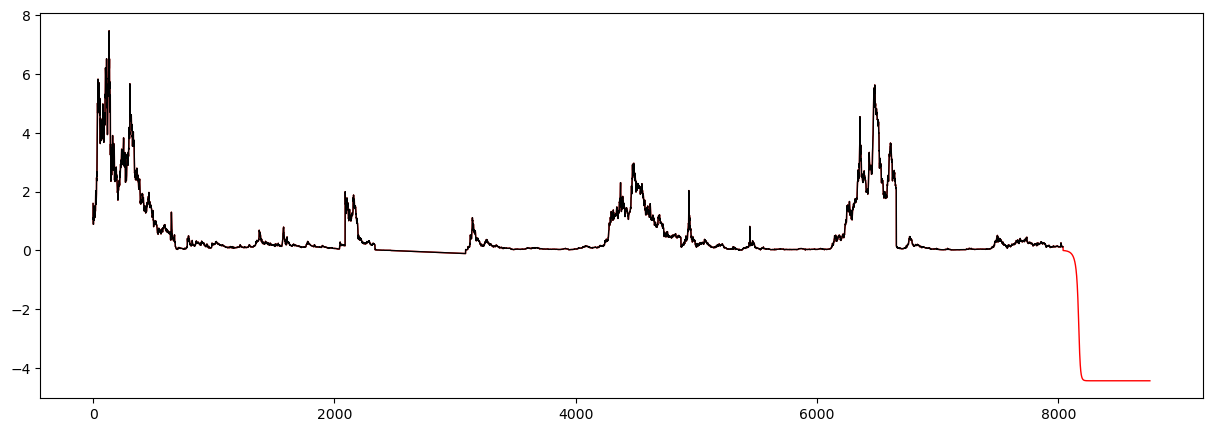

In [117]:
out=[]
out=np.append(df.close.values,new)
plt.figure(figsize=(15,5))
plt.plot(out,linewidth=1,color='red')
plt.plot(df.close.values,linewidth=1,color='black')
plt.show()

In [108]:
len(out),len(df.close)

(8520, 8040)

In [120]:
import pickle
model.save('model.h5')
filename='scaler.pkl'
f= open(filename,'wb')
pickle.dump(sc,f)
f.close

<function BufferedWriter.close()>